Project


In [34]:
import torch
import torch.nn as nn
import torch.optim as optim


**Define the Dataset**

In [35]:
import numpy as np

def generate_logic_gate_data(gate='AND'):
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
    if gate == 'AND':
        Y = np.array([[0], [0], [0], [1]], dtype=np.float32)
    elif gate == 'OR':
        Y = np.array([[0], [1], [1], [1]], dtype=np.float32)
    elif gate == 'XOR':
        Y = np.array([[0], [1], [1], [0]], dtype=np.float32)
    else:
        raise ValueError("Unknown gate type")
    return torch.from_numpy(X), torch.from_numpy(Y)


**Define model**

In [36]:
class LogicGateNN(nn.Module):
    def __init__(self):
        super(LogicGateNN, self).__init__()
        self.layer1 = nn.Linear(2, 2)
        self.layer2 = nn.Linear(2, 1)

    def forward(self, x):
        x = torch.sigmoid(self.layer1(x))
        x = torch.sigmoid(self.layer2(x))
        return x


**Training the Model**

In [37]:
X, Y = generate_logic_gate_data('AND')
model = LogicGateNN()
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

epochs = 10000
for epoch in range(epochs):
    optimizer.zero_grad()
    output = model(X)
    loss = criterion(output, Y)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 1000 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')


Epoch [1000/10000], Loss: 0.3103
Epoch [2000/10000], Loss: 0.0687
Epoch [3000/10000], Loss: 0.0289
Epoch [4000/10000], Loss: 0.0170
Epoch [5000/10000], Loss: 0.0117
Epoch [6000/10000], Loss: 0.0088
Epoch [7000/10000], Loss: 0.0070
Epoch [8000/10000], Loss: 0.0058
Epoch [9000/10000], Loss: 0.0049
Epoch [10000/10000], Loss: 0.0042


**MNIST**

**Setup and Imports**

In [38]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader


**Load and Preprocess the MNIST Dataset**

In [39]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform)
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)


**Define the Model**

In [40]:
class MNISTNN(nn.Module):
    def __init__(self):
        super(MNISTNN, self).__init__()
        self.layer1 = nn.Linear(28*28, 128)
        self.layer2 = nn.Linear(128, 64)
        self.layer3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = self.layer3(x)
        return x


**Training the Model**

In [41]:
model = MNISTNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

epochs = 5
for epoch in range(epochs):
    for images, labels in train_loader:
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')


Epoch [1/5], Loss: 0.7315
Epoch [2/5], Loss: 0.3531
Epoch [3/5], Loss: 0.3876
Epoch [4/5], Loss: 0.5344
Epoch [5/5], Loss: 0.1650


**Part 2: Visualisation
Step 1: Create a Visualisation Interface**

Epoch [1000/10000], Loss: 0.2436
Epoch [2000/10000], Loss: 0.0712
Epoch [3000/10000], Loss: 0.0340
Epoch [4000/10000], Loss: 0.0212
Epoch [5000/10000], Loss: 0.0151
Epoch [6000/10000], Loss: 0.0116
Epoch [7000/10000], Loss: 0.0093
Epoch [8000/10000], Loss: 0.0078
Epoch [9000/10000], Loss: 0.0066
Epoch [10000/10000], Loss: 0.0058


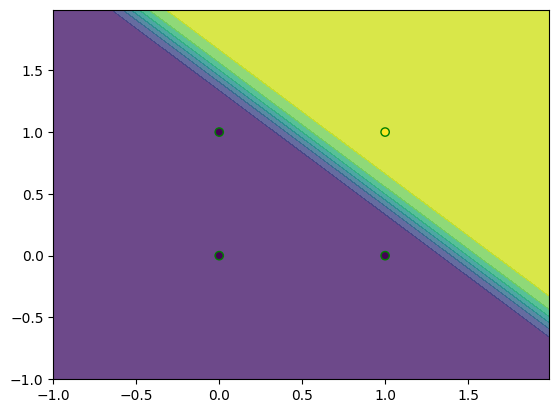

In [42]:
import matplotlib.pyplot as plt
def plot_decision_boundary(model, X, Y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model(torch.from_numpy(np.c_[xx.ravel(), yy.ravel()].astype(np.float32)))
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z.detach().numpy(), alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=Y.numpy(), edgecolors='g')
    plt.show()

# Generate data
X, Y = generate_logic_gate_data('AND')

# Initialize and train the model (Assuming the model has already been trained)
model = LogicGateNN()
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

epochs = 10000
for epoch in range(epochs):
    optimizer.zero_grad()
    output = model(X)
    loss = criterion(output, Y)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 1000 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Plot decision boundary
plot_decision_boundary(model, X, Y)

In [51]:
import gradio as gr

def predict_logic_gate(input):
    input = torch.Tensor([input])
    with torch.no_grad():
        output = model(input)
    return output.item()

iface = gr.Interface(fn=predict_logic_gate, inputs="number", outputs="number")
iface.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://cb41d55679874ee52b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


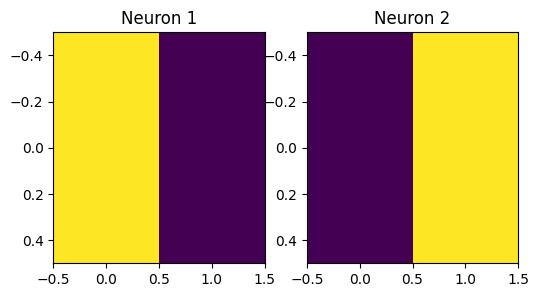

In [44]:
def plot_weights(model):
    first_layer_weights = model.layer1.weight.data
    fig, axes = plt.subplots(1, 2, figsize=(6, 3))
    for i, ax in enumerate(axes.flat):
        ax.imshow(first_layer_weights[i].unsqueeze(0).numpy(), cmap='viridis', aspect='auto')
        ax.set_title(f'Neuron {i+1}')
    plt.show()

plot_weights(model)


In [45]:
def predict_digit(image):
    image = image.view(-1, 28*28)
    with torch.no_grad():
        output = model(image)
    return torch.argmax(output, 1).item()

iface = gr.Interface(fn=predict_digit, inputs="sketchpad", outputs="number", live=True)
iface.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://335c6cb2accf84299b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
